In [189]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pickle as pk
%matplotlib inline

with open("data/X_admissions.df", "rb") as f: 
    X = pk.load(f)
       
with open("data/y_admissions.df", "rb") as f: 
    y = pk.load(f)

y = np.array([(i,t) for i,t in zip(y["Ingreso"], y["t"])], dtype=[('Ingreso','?'), ('t', '<f8')])
y

array([( True, 3.640e+02), ( True, 8.000e+01), ( True, 5.000e+01),
       ( True, 5.000e+01), ( True, 5.400e+01), ( True, 3.400e+01),
       ( True, 6.000e+01), ( True, 9.300e+01), ( True, 3.800e+01),
       ( True, 3.800e+01), ( True, 1.510e+02), ( True, 2.030e+02),
       ( True, 3.400e+01), ( True, 3.400e+01), ( True, 7.700e+01),
       ( True, 6.500e+01), ( True, 5.100e+02), ( True, 1.320e+02),
       ( True, 2.600e+01), ( True, 1.850e+02), ( True, 1.000e+01),
       ( True, 5.600e+01), ( True, 5.000e+01), ( True, 9.000e+00),
       ( True, 2.800e+01), ( True, 1.340e+02), ( True, 4.000e+00),
       ( True, 5.600e+01), ( True, 1.130e+02), ( True, 2.000e+01),
       ( True, 6.000e+01), ( True, 9.300e+01), ( True, 1.570e+02),
       ( True, 2.700e+01), ( True, 8.800e+01), ( True, 1.340e+02),
       ( True, 1.830e+02), ( True, 6.400e+01), ( True, 7.000e+00),
       ( True, 1.500e+01), ( True, 1.270e+02), ( True, 6.200e+01),
       ( True, 1.200e+01), ( True, 8.000e+00), ( True, 1.200e+

In [190]:
for column in X.columns: 
    print(f'{column} ({X[column].min()} - {X[column].max()})')

AnchuraQRS (80.0 - 210.0)
Creatinina (0.17 - 6.39)
FC_x (40.0 - 156.0)
FC_y (40.0 - 120.0)
FEVI (0.15 - 0.8)
HB (8.4 - 19.4)
IMC (6.176509857177734 - 49.58677673339844)
K (3.4 - 6.5)
PAS (11.0 - 180.0)
SaO2 (85.0 - 100.0)
Urato (2.6 - 11.9)
Urea (4.0 - 218.0)
proBNP (10.0 - 29300.0)
idFR_TipoFumador (0.0 - 3.0)
idRitmoECG (0.0 - 3.0)
idTipoMiocardiopatia (1.0 - 9.0)
ARAII (False - True)
ARAII_pasado (False - True)
ARM (False - True)
ARM_pasado (False - True)
DMEstado (False - True)
EPOCEstado (False - True)
FAEstado (False - True)
HTAestado (False - True)
IECA (False - True)
IECA_pasado (False - True)
IMEstado (False - True)
I_RenalEstado (False - True)
SAHSEstado (False - True)
antiarrítmico (False - True)
antiarrítmico_pasado (False - True)
antidiabético (False - True)
antidiabético_pasado (False - True)
arteriopatiaPerifericaEstado (False - True)
betabloqueante (False - True)
betabloqueante/ivabradina (False - True)
betabloqueante/ivabradina_pasado (False - True)
betabloqueante_pasa

In [191]:
names_map = {
    'idFR_TipoFumador': 'Smoker', 
    'DMEstado': 'Diabetes Mellitus', 
    'dislipemiaEstado': 'Dyslipidemia', 
    'HTAestado': 'Hypertension', 
    'idTipoMiocardiopatia': 'Cardiomyopathy type', 
    'portadoTCREstado': 'Cardiac resynchronisation therapy', 
    'portadorDAIEstado': 'Automated External\nDefibrillator', 
    'FAEstado': 'Atrial fibrillation', 
    'EPOCEstado': 'Chronic obstructive pulmonary disease', 
    'SAHSEstado': 'Sleep apnoeas/hypopneas syndrome', 
    'arteriopatiaPerifericaEstado': 'peripheral artery disease', 
    'deterioroCognitivoEstado': 'Cognitive impairment', 
    'enfermedadCerebroVascularEstado': 'Cerebrovascular disease', 
    'I_RenalEstado': 'Renal disease', 
    'neoplasiaEstado': 'Neoplasm', 
    'depresionEstado': 'Depression', 
    'hemorragiaPreviaEstado': 'Previous Haemorrhage', 
    'hepatopatiaEstado': 'Hepatic disease', 
    'ulceraGastroduodenal': 'Peptic ulcer disease', 
    'conectivopatiaEstado': 'Connective tissue disease', 
    'HB': 'Hemoglobin', 
    'Creatinina': 'Creatinine', 
    'Urea': 'Urea', 
    'K': 'Potassium', 
    'proBNP': 'NT-proBNP', 
    'Urato': 'Urate', 
    'idRitmoECG': 'Rhythm', 
    'FC_x': 'Heart rate (ECG)', 
    'AnchuraQRS': 'QRS wide', 
    'hipertensionPulmonarEstado': 'Pulmonary hypertension', 
    'FEVI': 'LVEF', 
    'IMEstado': 'Acute myocardial infarction (AMI)', 
    'IMC': 'Body mass index (BMI)', 
    'PAS': 'Systolic blood pressure', 
    'FC_y': 'Heart rate (Physical examination)', 
    'SaO2': 'Oxygen saturation', 
    'betabloqueante': 'Beta blockers', 'betabloqueante_pasado': 'Past Beta blockers', 
    'IECA': 'ACE inhibitor', 'IECA_pasado': 'Past ACE inhibitor', 
    'ARAII': 'Angiotensin II receptors', 'ARAII_pasado': 'Past Antiotensin II receptors', 
    'ARM': 'MRA', 'ARM_pasado': 'Past MRA', 
    'sacubitril/valsartan': 'Sacubitril/valsartan', 'sacubitril/valsartan_pasado': 'Past Sacubitril/valsartan', 
    'digoxina': 'Digoxin', 'digoxima_pasado': 'Past Digoxin', 
    'ivabradina': 'Ivabradine', 'ivabradina_pasado': 'Past Ivabradine', 
    'diurético': 'Diuretic', 'diurético_pasado': 'Past Diuretic', 
    'antidiabético': 'Antidiabetics', 'antidiabético_pasado': 'Past Antidiabetics', 
    'antiarrítmico': 'Antiarrhythmic agent', 'antiarrítmico_pasado': 'Past Antiarrhythmic agent',
    'betabloqueante/ivabradina': 'Beta blockers/Ivabradine', 'betabloqueante/ivabradina_pasado': 'Past Beta blockers/Ivabradine', 
    'idCONSULTA_MED_ClaseFuncionalActual': 'Functional Classification'
    
}

## Categorical and boolean 

<>:18: SyntaxWarning: invalid escape sequence '\h'
<>:18: SyntaxWarning: invalid escape sequence '\h'
/tmp/ipykernel_567472/3132318001.py:18: SyntaxWarning: invalid escape sequence '\h'
  plt.ylabel("est. probability of survival $\hat{S}(t)$")


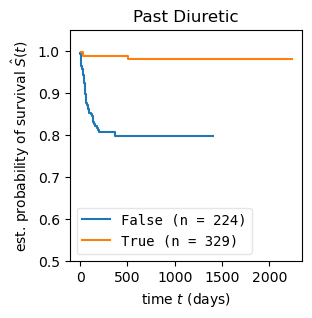

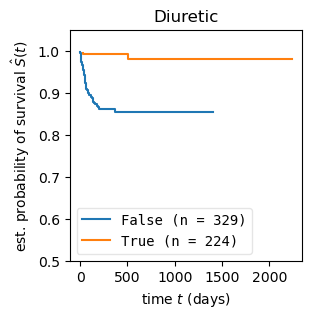

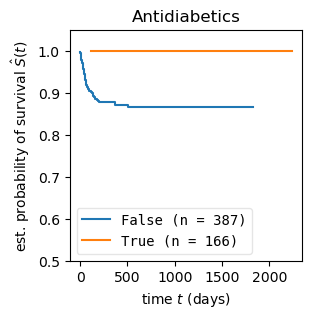

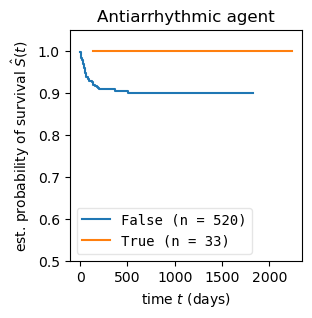

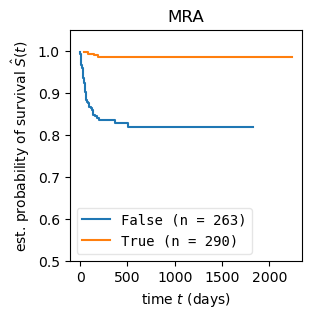

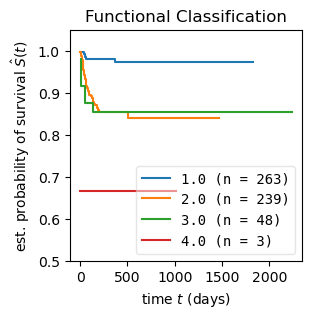

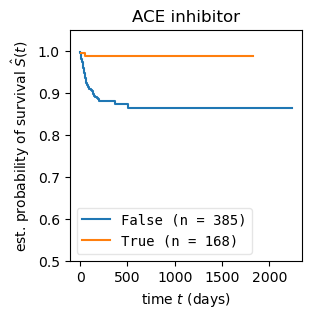

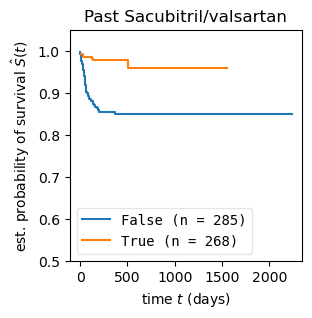

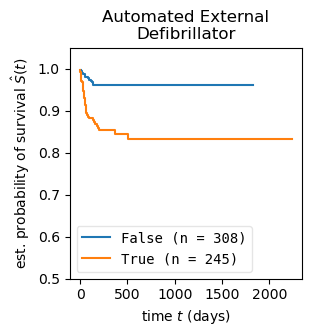

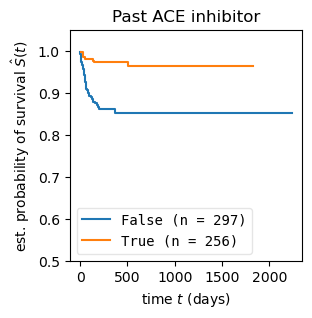

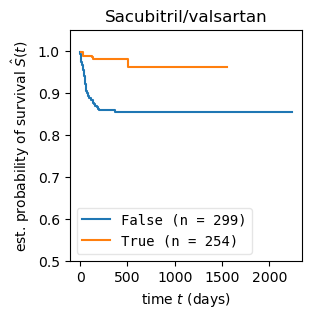

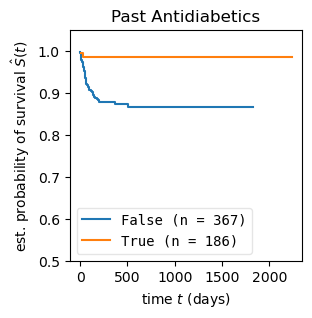

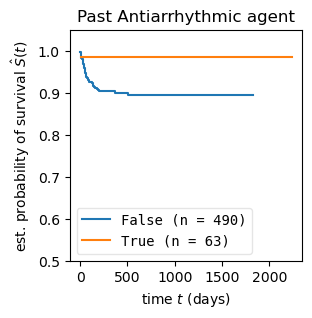

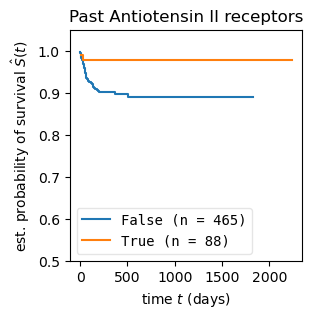

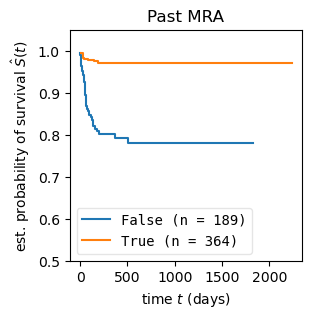

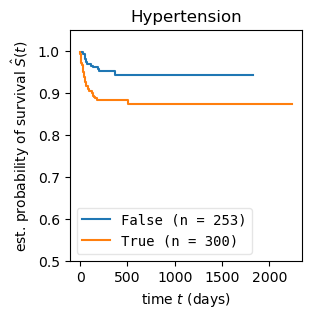

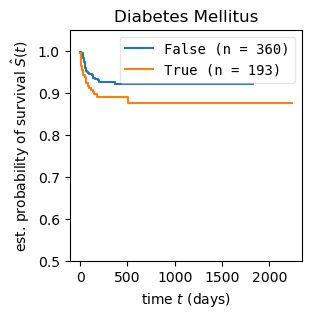

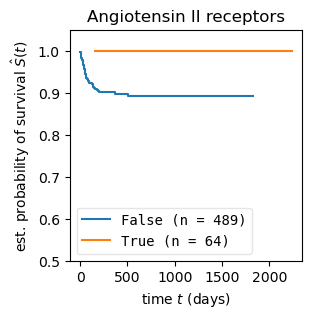

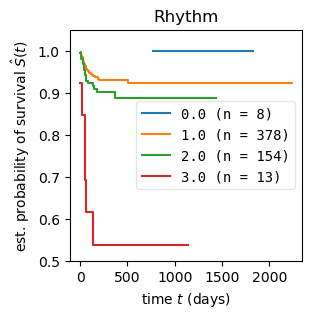

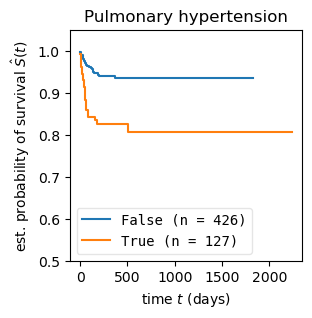

In [192]:
from sksurv.nonparametric import kaplan_meier_estimator
from sksurv.compare import compare_survival

feature_names = ['diurético_pasado', 'diurético', 'antidiabético', 'antiarrítmico', 'ARM', 'idCONSULTA_MED_ClaseFuncionalActual', 'IECA', 
                 'sacubitril/valsartan_pasado', 'portadorDAIEstado', 'IECA_pasado', 'sacubitril/valsartan', 'antidiabético_pasado', 
                 'antiarrítmico_pasado', 'ARAII_pasado', 'ARM_pasado', 'HTAestado', 'DMEstado', 'ARAII', 'idRitmoECG', 
                 'hipertensionPulmonarEstado']

for feature in feature_names: 
    fig = plt.figure(figsize=(3,3))
    for value in np.sort(X[feature].unique()): 
        mask = X[feature] == value
        time_cell, survival_prob_cell = kaplan_meier_estimator(y['Ingreso'][mask], y['t'][mask])

        plt.step(time_cell, survival_prob_cell, where='post', label="%s (n = %d)" % (value, mask.sum()))

    plt.title(f'{names_map[feature]}')
    plt.ylabel("est. probability of survival $\hat{S}(t)$")
    plt.xlabel("time $t$ (days)")
    plt.ylim(0.5, 1.05)
    plt.legend(loc="best", framealpha=0.5, prop={'family': 'DejaVu Sans Mono'})
    fig.savefig(f'figs/KM_{feature.replace("/", "_")}.pdf', bbox_inches='tight', format='pdf')

## FEVI

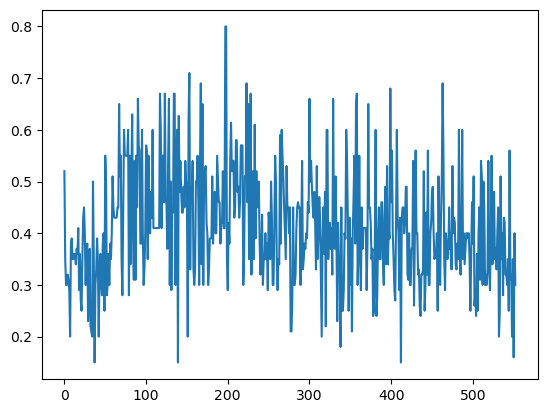

In [193]:
feature='FEVI'
plt.plot(X[feature])
FEVI_numerical = X[feature]

values = []
for v in FEVI_numerical: 
    if v<0.25: 
        values.append("0.00-0.25")
    elif v<0.5: 
        values.append("0.25-0.50")
    else: 
        values.append("0.50-0.80")
        
FEVI_categorical = pd.DataFrame(data={feature: values})

<>:9: SyntaxWarning: invalid escape sequence '\h'
<>:9: SyntaxWarning: invalid escape sequence '\h'
/tmp/ipykernel_567472/1766367209.py:9: SyntaxWarning: invalid escape sequence '\h'
  plt.ylabel("est. probability of survival $\hat{S}(t)$")


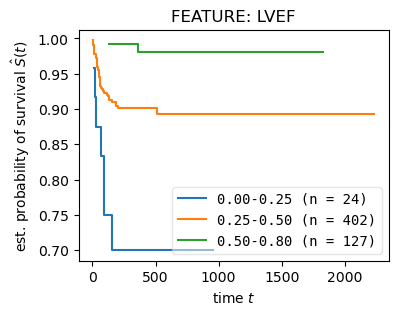

In [194]:
plt.figure(figsize=(4,3))
for value in np.sort(FEVI_categorical[feature].unique()): 
    mask = FEVI_categorical[feature] == value
    time_cell, survival_prob_cell = kaplan_meier_estimator(y["Ingreso"][mask], y["t"][mask])

    plt.step(time_cell, survival_prob_cell, where="post", label="%s (n = %d)" % (value, mask.sum()))

plt.title(f'FEATURE: {names_map[feature]}')
plt.ylabel("est. probability of survival $\hat{S}(t)$")
plt.xlabel("time $t$")
plt.legend(loc="best", framealpha=0.5, prop={'family': 'DejaVu Sans Mono'})

## HB

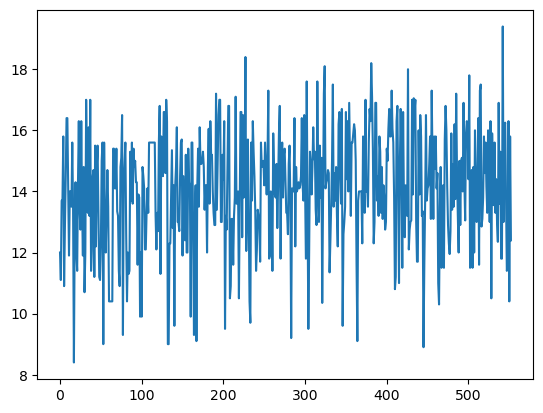

In [195]:
feature='HB'
plt.plot(X[feature])
HB_numerical = X[feature]

values = []
for v in HB_numerical: 
    if v<11: 
        values.append(" 8-11")
    elif v<14: 
        values.append("11-14")
    elif v<17: 
        values.append("14-17")
    else: 
        values.append("17-20")
HB_categorical = pd.DataFrame(data={feature: values})

<>:9: SyntaxWarning: invalid escape sequence '\h'
<>:9: SyntaxWarning: invalid escape sequence '\h'
/tmp/ipykernel_567472/150991200.py:9: SyntaxWarning: invalid escape sequence '\h'
  plt.ylabel("est. probability of survival $\hat{S}(t)$")


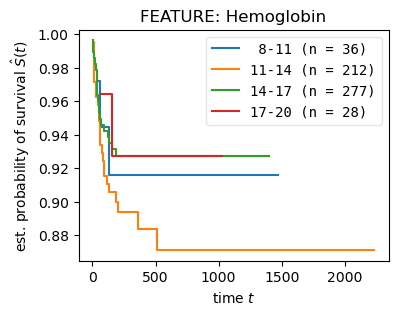

In [196]:
plt.figure(figsize=(4,3))
for value in np.sort(HB_categorical[feature].unique()): 
    mask = HB_categorical[feature] == value
    time_cell, survival_prob_cell = kaplan_meier_estimator(y["Ingreso"][mask], y["t"][mask])

    plt.step(time_cell, survival_prob_cell, where="post", label="%s (n = %d)" % (value, mask.sum()))

plt.title(f'FEATURE: {names_map[feature]}')
plt.ylabel("est. probability of survival $\hat{S}(t)$")
plt.xlabel("time $t$")
plt.legend(loc="best", framealpha=0.5, prop={'family': 'DejaVu Sans Mono'})

## Creatinina

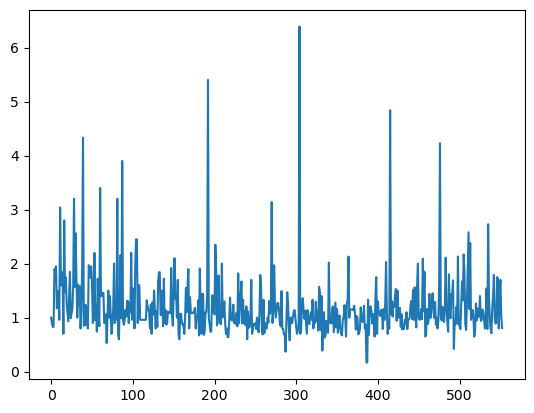

In [197]:
feature='Creatinina'
plt.plot(X[feature])
Creatinina_numerical = X[feature]

values = []
for v in Creatinina_numerical: 
    if v<1.5: 
        values.append("0.0-1.5")
    elif v<3: 
        values.append("1.5-3.0")
    elif v<4.5: 
        values.append("3.0-4.5")
    else: 
        values.append("4.5-6.5")
Creatinina_categorical = pd.DataFrame(data={feature: values})

<>:9: SyntaxWarning: invalid escape sequence '\h'
<>:9: SyntaxWarning: invalid escape sequence '\h'
/tmp/ipykernel_567472/2656424114.py:9: SyntaxWarning: invalid escape sequence '\h'
  plt.ylabel("est. probability of survival $\hat{S}(t)$")


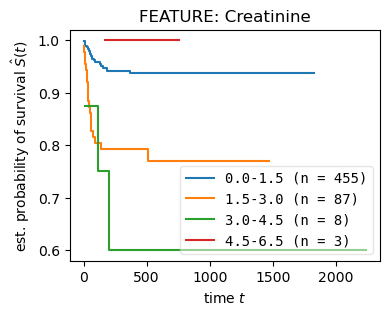

In [198]:
plt.figure(figsize=(4,3))
for value in np.sort(Creatinina_categorical[feature].unique()): 
    mask = Creatinina_categorical[feature] == value
    time_cell, survival_prob_cell = kaplan_meier_estimator(y["Ingreso"][mask], y["t"][mask])

    plt.step(time_cell, survival_prob_cell, where="post", label="%s (n = %d)" % (value, mask.sum()))

plt.title(f'FEATURE: {names_map[feature]}')
plt.ylabel("est. probability of survival $\hat{S}(t)$")
plt.xlabel("time $t$")
plt.legend(loc="best", framealpha=0.5, prop={'family': 'DejaVu Sans Mono'})

## Urea

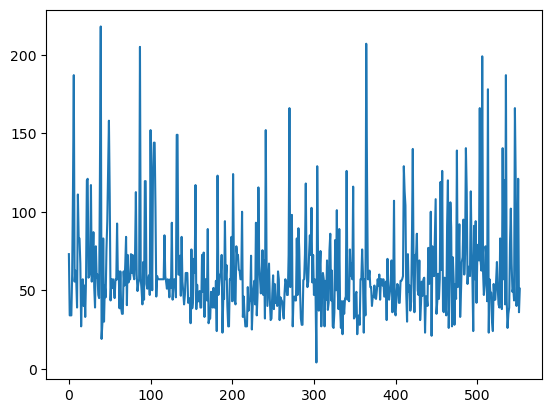

In [199]:
feature='Urea'
plt.plot(X[feature])
Urea_numerical = X[feature]

values = []
for v in Urea_numerical: 
    if v<55: 
        values.append("  0- 55")
    elif v<110: 
        values.append(" 55-110")
    elif v<165: 
        values.append("110-165")
    else: 
        values.append("165-220")
Urea_categorical = pd.DataFrame(data={feature: values})

<>:9: SyntaxWarning: invalid escape sequence '\h'
<>:9: SyntaxWarning: invalid escape sequence '\h'
/tmp/ipykernel_567472/4159418866.py:9: SyntaxWarning: invalid escape sequence '\h'
  plt.ylabel("est. probability of survival $\hat{S}(t)$")


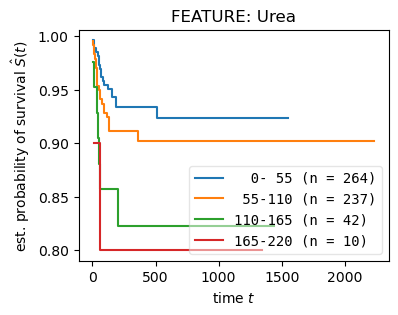

In [200]:
plt.figure(figsize=(4,3))
for value in np.sort(Urea_categorical[feature].unique()): 
    mask = Urea_categorical[feature] == value
    time_cell, survival_prob_cell = kaplan_meier_estimator(y["Ingreso"][mask], y["t"][mask])

    plt.step(time_cell, survival_prob_cell, where="post", label="%s (n = %d)" % (value, mask.sum()))

plt.title(f'FEATURE: {names_map[feature]}')
plt.ylabel("est. probability of survival $\hat{S}(t)$")
plt.xlabel("time $t$")
plt.legend(loc="best", framealpha=0.5, prop={'family': 'DejaVu Sans Mono'})

## K

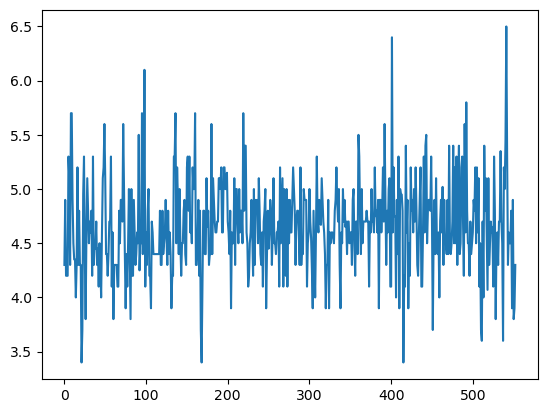

In [201]:
feature='K'
plt.plot(X[feature])
K_numerical = X[feature]

values = []
for v in K_numerical: 
    if v<4.25: 
        values.append("3.40-4.25")
    elif v<5: 
        values.append("4.25-5.00")
    elif v<5.75: 
        values.append("5.00-5.75")
    else: 
        values.append("5.75-6.50")
K_categorical = pd.DataFrame(data={feature: values})

<>:9: SyntaxWarning: invalid escape sequence '\h'
<>:9: SyntaxWarning: invalid escape sequence '\h'
/tmp/ipykernel_567472/2966823484.py:9: SyntaxWarning: invalid escape sequence '\h'
  plt.ylabel("est. probability of survival $\hat{S}(t)$")


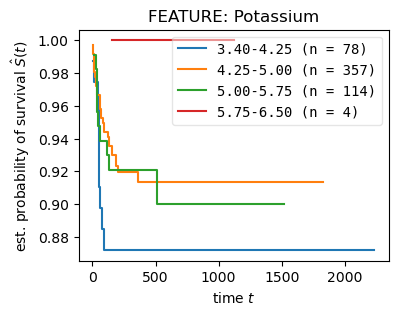

In [202]:
plt.figure(figsize=(4,3))
for value in np.sort(K_categorical[feature].unique()): 
    mask = K_categorical[feature] == value
    time_cell, survival_prob_cell = kaplan_meier_estimator(y["Ingreso"][mask], y["t"][mask])

    plt.step(time_cell, survival_prob_cell, where="post", label="%s (n = %d)" % (value, mask.sum()))

plt.title(f'FEATURE: {names_map[feature]}')
plt.ylabel("est. probability of survival $\hat{S}(t)$")
plt.xlabel("time $t$")
plt.legend(loc="best", framealpha=0.5, prop={'family': 'DejaVu Sans Mono'})

## proBNP

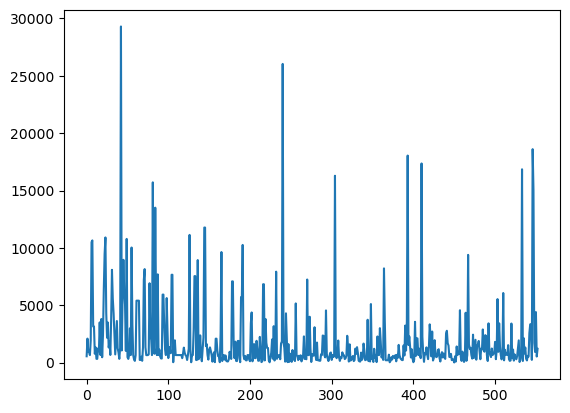

In [203]:
feature='proBNP'
plt.plot(X[feature])
proBNP_numerical = X[feature]

values = []
for v in proBNP_numerical: 
    if v<7500: 
        values.append("    0- 7500")
    elif v<15000: 
        values.append(" 7500-15000")
    elif v<22500: 
        values.append("15000-22500")
    else: 
        values.append("22500-30000")
proBNP_categorical = pd.DataFrame(data={feature: values})

<>:9: SyntaxWarning: invalid escape sequence '\h'
<>:9: SyntaxWarning: invalid escape sequence '\h'
/tmp/ipykernel_567472/2915748534.py:9: SyntaxWarning: invalid escape sequence '\h'
  plt.ylabel("est. probability of survival $\hat{S}(t)$")


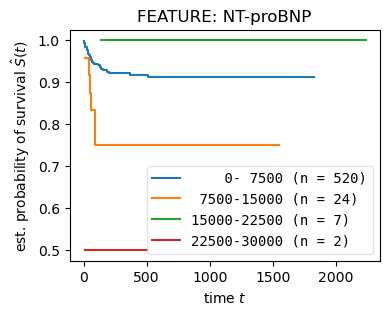

In [204]:
plt.figure(figsize=(4,3))
for value in np.sort(proBNP_categorical[feature].unique()): 
    mask = proBNP_categorical[feature] == value
    time_cell, survival_prob_cell = kaplan_meier_estimator(y["Ingreso"][mask], y["t"][mask])

    plt.step(time_cell, survival_prob_cell, where="post", label="%s (n = %d)" % (value, mask.sum()))

plt.title(f'FEATURE: {names_map[feature]}')
plt.ylabel("est. probability of survival $\hat{S}(t)$")
plt.xlabel("time $t$")
plt.legend(loc="best", framealpha=0.5, prop={'family': 'DejaVu Sans Mono'})

## Urato

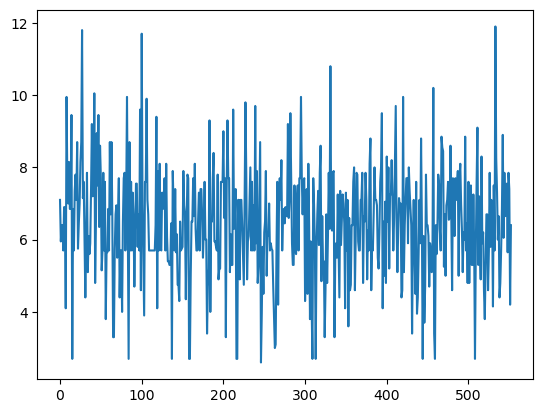

In [205]:
feature='Urato'
plt.plot(X[feature])
Urato_numerical = X[feature]

values = []
for v in Urato_numerical: 
    if v<3: 
        values.append("0- 3")
    elif v<6: 
        values.append("3- 6")
    elif v<9: 
        values.append("6- 9")
    else: 
        values.append("9-12")
Urato_categorical = pd.DataFrame(data={feature: values})

<>:9: SyntaxWarning: invalid escape sequence '\h'
<>:9: SyntaxWarning: invalid escape sequence '\h'
/tmp/ipykernel_567472/3976497364.py:9: SyntaxWarning: invalid escape sequence '\h'
  plt.ylabel("est. probability of survival $\hat{S}(t)$")


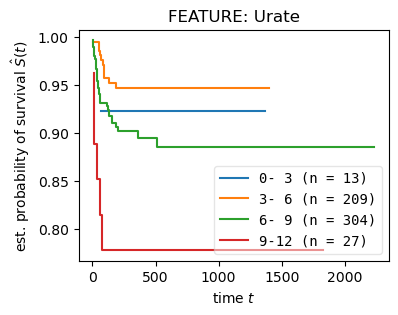

In [206]:
plt.figure(figsize=(4,3))
for value in np.sort(Urato_categorical[feature].unique()): 
    mask = Urato_categorical[feature] == value
    time_cell, survival_prob_cell = kaplan_meier_estimator(y["Ingreso"][mask], y["t"][mask])

    plt.step(time_cell, survival_prob_cell, where="post", label="%s (n = %d)" % (value, mask.sum()))

plt.title(f'FEATURE: {names_map[feature]}')
plt.ylabel("est. probability of survival $\hat{S}(t)$")
plt.xlabel("time $t$")
plt.legend(loc="best", framealpha=0.5, prop={'family': 'DejaVu Sans Mono'})

## FC_x

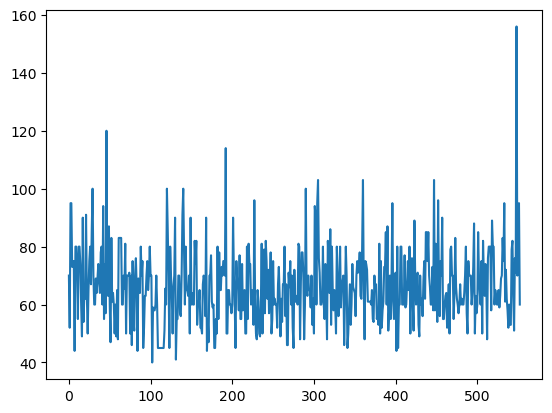

In [207]:
feature='FC_x'
plt.plot(X[feature])
FC_x_numerical = X[feature]

values = []
for v in FC_x_numerical: 
    if v<60: 
        values.append(" 40- 60")
    elif v<80: 
        values.append(" 60- 80")
    elif v<100: 
        values.append(" 80-100")
    else: 
        values.append("100-160")
FC_x_categorical = pd.DataFrame(data={feature: values})

<>:9: SyntaxWarning: invalid escape sequence '\h'
<>:9: SyntaxWarning: invalid escape sequence '\h'
/tmp/ipykernel_567472/2360362664.py:9: SyntaxWarning: invalid escape sequence '\h'
  plt.ylabel("est. probability of survival $\hat{S}(t)$")


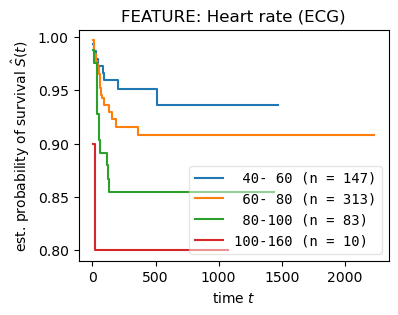

In [208]:
plt.figure(figsize=(4,3))
for value in np.sort(FC_x_categorical[feature].unique()): 
    mask = FC_x_categorical[feature] == value
    time_cell, survival_prob_cell = kaplan_meier_estimator(y["Ingreso"][mask], y["t"][mask])

    plt.step(time_cell, survival_prob_cell, where="post", label="%s (n = %d)" % (value, mask.sum()))

plt.title(f'FEATURE: {names_map[feature]}')
plt.ylabel("est. probability of survival $\hat{S}(t)$")
plt.xlabel("time $t$")
plt.legend(loc="best", framealpha=0.5, prop={'family': 'DejaVu Sans Mono'})

## FC_y

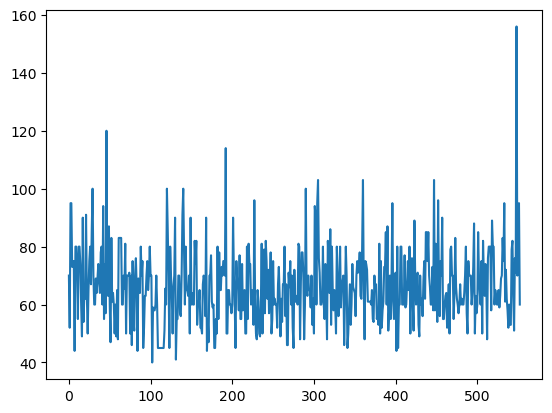

In [209]:
fature='FC_y'
plt.plot(X[feature])
FC_y_numerical = X[feature]

values = []
for v in FC_y_numerical: 
    if v<60: 
        values.append(" 40- 60")
    elif v<80: 
        values.append(" 60- 80")
    elif v<100: 
        values.append(" 80-100")
    else: 
        values.append("100-160")
FC_y_categorical = pd.DataFrame(data={feature: values})

<>:9: SyntaxWarning: invalid escape sequence '\h'
<>:9: SyntaxWarning: invalid escape sequence '\h'
/tmp/ipykernel_567472/2513061719.py:9: SyntaxWarning: invalid escape sequence '\h'
  plt.ylabel("est. probability of survival $\hat{S}(t)$")


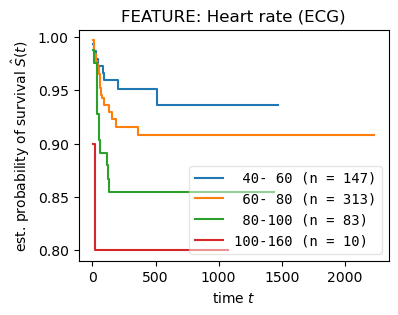

In [210]:
plt.figure(figsize=(4,3))
for value in np.sort(FC_y_categorical[feature].unique()): 
    mask = FC_y_categorical[feature] == value
    time_cell, survival_prob_cell = kaplan_meier_estimator(y["Ingreso"][mask], y["t"][mask])

    plt.step(time_cell, survival_prob_cell, where="post", label="%s (n = %d)" % (value, mask.sum()))

plt.title(f'FEATURE: {names_map[feature]}')
plt.ylabel("est. probability of survival $\hat{S}(t)$")
plt.xlabel("time $t$")
plt.legend(loc="best", framealpha=0.5, prop={'family': 'DejaVu Sans Mono'})

## AnchuraQRS

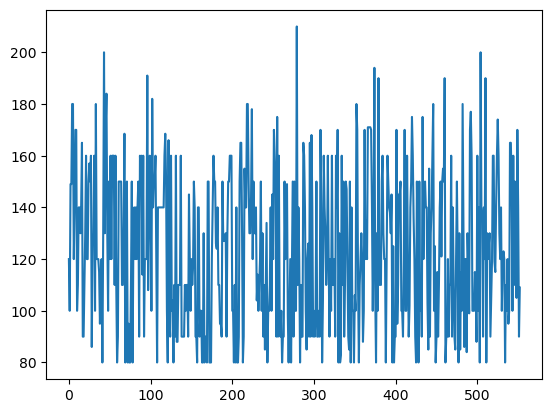

In [211]:
feature='AnchuraQRS'
plt.plot(X[feature])
AnchuraQRS_numerical = X[feature]

values = []
for v in AnchuraQRS_numerical: 
    if v<115: 
        values.append(" 80-115")
    elif v<150: 
        values.append("115-150")
    elif v<185: 
        values.append("150-185")
    else: 
        values.append("185-220")
AnchuraQRS_categorical = pd.DataFrame(data={feature: values})

<>:9: SyntaxWarning: invalid escape sequence '\h'
<>:9: SyntaxWarning: invalid escape sequence '\h'
/tmp/ipykernel_567472/1338599109.py:9: SyntaxWarning: invalid escape sequence '\h'
  plt.ylabel("est. probability of survival $\hat{S}(t)$")


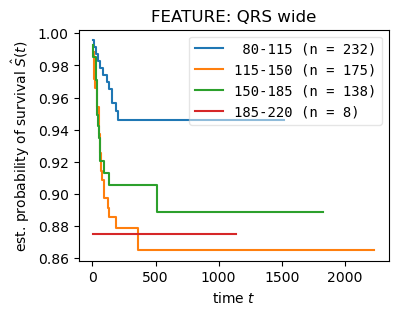

In [212]:
plt.figure(figsize=(4,3))
for value in np.sort(AnchuraQRS_categorical[feature].unique()): 
    mask = AnchuraQRS_categorical[feature] == value
    time_cell, survival_prob_cell = kaplan_meier_estimator(y["Ingreso"][mask], y["t"][mask])

    plt.step(time_cell, survival_prob_cell, where="post", label="%s (n = %d)" % (value, mask.sum()))

plt.title(f'FEATURE: {names_map[feature]}')
plt.ylabel("est. probability of survival $\hat{S}(t)$")
plt.xlabel("time $t$")
plt.legend(loc="best", framealpha=0.5, prop={'family': 'DejaVu Sans Mono'})

## IMC

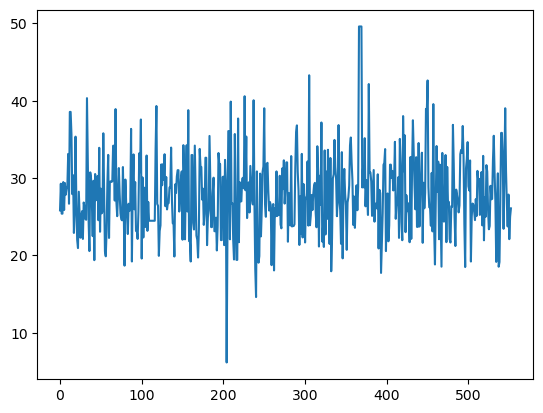

In [213]:
feature='IMC'
plt.plot(X[feature])
IMC_numerical = X[feature]

values = []
for v in IMC_numerical: 
    if v<18.5: 
        values.append(" 0.0-18.5")
    elif v<25: 
        values.append("18.5-25.0")
    elif v<37.5: 
        values.append("25.0-30.0")
    else: 
        values.append("30.0-50.0")
IMC_categorical = pd.DataFrame(data={feature: values})

<>:9: SyntaxWarning: invalid escape sequence '\h'
<>:9: SyntaxWarning: invalid escape sequence '\h'
/tmp/ipykernel_567472/284098438.py:9: SyntaxWarning: invalid escape sequence '\h'
  plt.ylabel("est. probability of survival $\hat{S}(t)$")


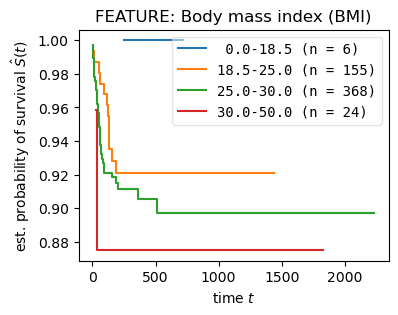

In [214]:
plt.figure(figsize=(4,3))
for value in np.sort(IMC_categorical[feature].unique()): 
    mask = IMC_categorical[feature] == value
    time_cell, survival_prob_cell = kaplan_meier_estimator(y["Ingreso"][mask], y["t"][mask])

    plt.step(time_cell, survival_prob_cell, where="post", label="%s (n = %d)" % (value, mask.sum()))

plt.title(f'FEATURE: {names_map[feature]}')
plt.ylabel("est. probability of survival $\hat{S}(t)$")
plt.xlabel("time $t$")
plt.legend(loc="best", framealpha=0.5, prop={'family': 'DejaVu Sans Mono'})

## SaO2

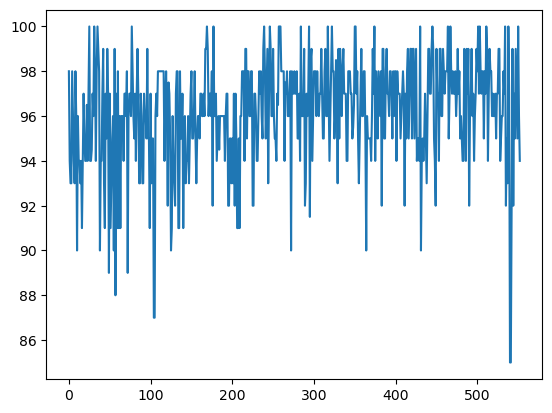

In [215]:
feature='SaO2'
plt.plot(X[feature])
SaO2_numerical = X[feature]

values = []
for v in SaO2_numerical: 
    if v<90: 
        values.append("85- 90")
    elif v<95: 
        values.append("90- 95")
    else: 
        values.append("95-100")
SaO2_categorical = pd.DataFrame(data={feature: values})

<>:9: SyntaxWarning: invalid escape sequence '\h'
<>:9: SyntaxWarning: invalid escape sequence '\h'
/tmp/ipykernel_567472/3337886396.py:9: SyntaxWarning: invalid escape sequence '\h'
  plt.ylabel("est. probability of survival $\hat{S}(t)$")


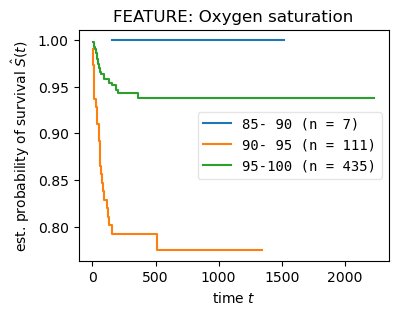

In [216]:
plt.figure(figsize=(4,3))
for value in np.sort(SaO2_categorical[feature].unique()): 
    mask = SaO2_categorical[feature] == value
    time_cell, survival_prob_cell = kaplan_meier_estimator(y["Ingreso"][mask], y["t"][mask])

    plt.step(time_cell, survival_prob_cell, where="post", label="%s (n = %d)" % (value, mask.sum()))

plt.title(f'FEATURE: {names_map[feature]}')
plt.ylabel("est. probability of survival $\hat{S}(t)$")
plt.xlabel("time $t$")
plt.legend(loc="best", framealpha=0.5, prop={'family': 'DejaVu Sans Mono'})

## PAS

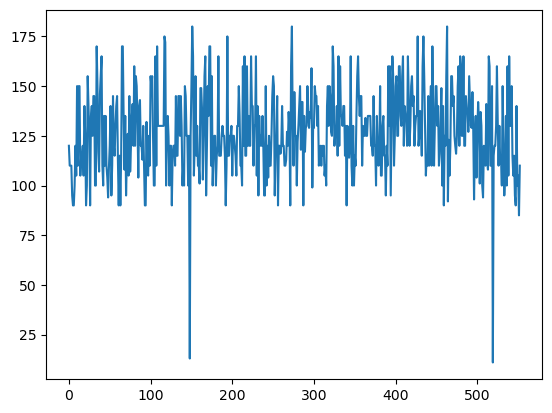

In [217]:
feature='PAS'
plt.plot(X[feature])
PAS_numerical = X[feature]

values = []
for v in PAS_numerical: 
    if v<105: 
        values.append(" 80-105")
    elif v<130: 
        values.append("105-130")
    elif v<155: 
        values.append("130-155")
    else: 
        values.append("155-180")
PAS_categorical = pd.DataFrame(data={feature: values})

<>:9: SyntaxWarning: invalid escape sequence '\h'
<>:9: SyntaxWarning: invalid escape sequence '\h'
/tmp/ipykernel_567472/3193825657.py:9: SyntaxWarning: invalid escape sequence '\h'
  plt.ylabel("est. probability of survival $\hat{S}(t)$")


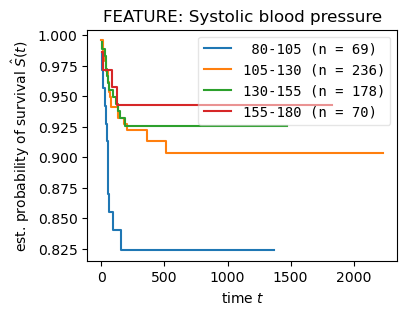

In [218]:
plt.figure(figsize=(4,3))
for value in np.sort(PAS_categorical[feature].unique()): 
    mask = PAS_categorical[feature] == value
    time_cell, survival_prob_cell = kaplan_meier_estimator(y["Ingreso"][mask], y["t"][mask])

    plt.step(time_cell, survival_prob_cell, where="post", label="%s (n = %d)" % (value, mask.sum()))

plt.title(f'FEATURE: {names_map[feature]}')
plt.ylabel("est. probability of survival $\hat{S}(t)$")
plt.xlabel("time $t$")
plt.legend(loc="best", framealpha=0.5, prop={'family': 'DejaVu Sans Mono'})

## Generate Present and past mediations plots

<>:13: SyntaxWarning: invalid escape sequence '\h'
<>:13: SyntaxWarning: invalid escape sequence '\h'
/tmp/ipykernel_567472/882749090.py:13: SyntaxWarning: invalid escape sequence '\h'
  plt.ylabel("estimated $\hat{S}(t)$")


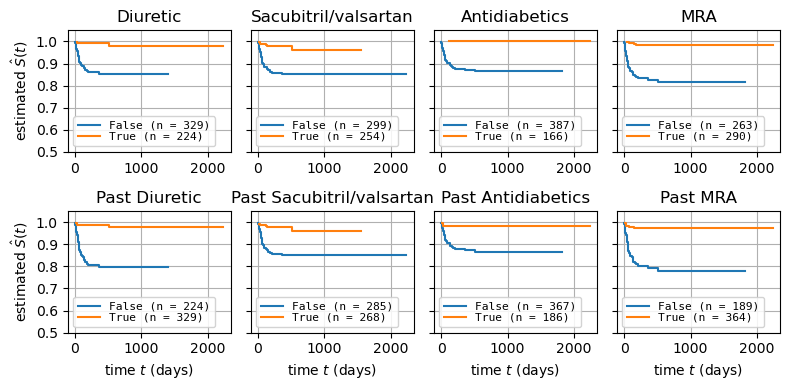

In [219]:
feature_names = ['diurético', 'sacubitril/valsartan', 'antidiabético', 'ARM', 
                 'diurético_pasado', 'sacubitril/valsartan_pasado', 'antidiabético_pasado', 'ARM_pasado']
                 
fig = plt.figure(figsize=(8,4))
for i, feature in enumerate(feature_names): 
    plt.subplot(2, 4, i+1)
    for value in np.sort(X[feature].unique()): 
        mask = X[feature] == value
        time_cell, survival_prob_cell = kaplan_meier_estimator(y['Ingreso'][mask], y['t'][mask])
        plt.step(time_cell, survival_prob_cell, where='post', label="%s (n = %d)" % (value, mask.sum()))
        plt.title(f'{names_map[feature]}')
    if i in [0, 4]: 
        plt.ylabel("estimated $\hat{S}(t)$")
        plt.yticks([0.5, 0.6, 0.7, 0.8, 0.9, 1.0])
    else: 
        plt.yticks([0.5, 0.6, 0.7, 0.8, 0.9, 1.0], ['', '', '', '', '', ''])
    if i in [4, 5, 6, 7]: 
        plt.xlabel("time $t$ (days)")
    plt.ylim(0.5, 1.05)
    plt.tight_layout()
    plt.grid()
    plt.legend(loc="best", framealpha=0.85, labelspacing=0.1, prop={'family': 'DejaVu Sans Mono', 'size': 8.1})
fig.savefig(f'figs/KM_medications.pdf', bbox_inches='tight', format='pdf')

## Generate blood test plots

<>:14: SyntaxWarning: invalid escape sequence '\h'
<>:14: SyntaxWarning: invalid escape sequence '\h'
/tmp/ipykernel_567472/4111369152.py:14: SyntaxWarning: invalid escape sequence '\h'
  plt.ylabel("estimated $\hat{S}(t)$")


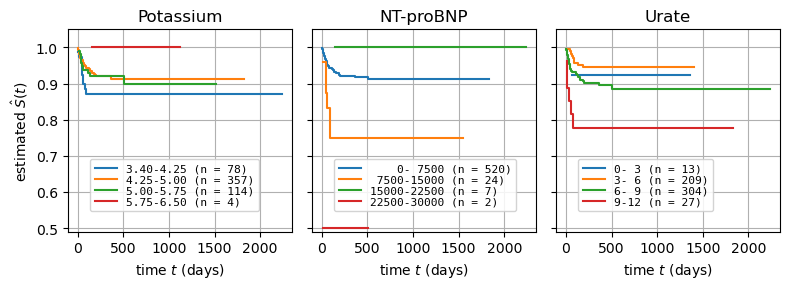

In [220]:
feature_names = ['K', 'proBNP', 'Urato']
feature_X = [K_categorical, proBNP_categorical, Urato_categorical]

fig = plt.figure(figsize=(8, 3))
for i, (feature, X) in enumerate(zip(feature_names, feature_X)): 
    plt.subplot(1, 3, i+1)
    for value in np.sort(X[feature].unique()): 
        mask = X[feature] == value
        time_cell, survival_prob_cell = kaplan_meier_estimator(y['Ingreso'][mask], y['t'][mask])
        plt.step(time_cell, survival_prob_cell, where='post', label="%s (n = %d)" % (value, mask.sum()))
        plt.title(f'{names_map[feature]}')

    if i in [0]: 
        plt.ylabel("estimated $\hat{S}(t)$")
        plt.yticks([0.5, 0.6, 0.7, 0.8, 0.9, 1.0])
    else: 
        plt.yticks([0.5, 0.6, 0.7, 0.8, 0.9, 1.0], ['', '', '', '', '', ''])
    plt.xlabel("time $t$ (days)")
    plt.ylim(0.49, 1.05)
    plt.tight_layout()
    plt.grid()
    plt.legend(loc=[0.1, 0.1], framealpha=0.85, labelspacing=0.1, prop={'family': 'DejaVu Sans Mono', 'size': 8.1})
fig.savefig(f'figs/KM_blood_test.pdf', bbox_inches='tight', format='pdf')

## Generate ECG plots

<>:14: SyntaxWarning: invalid escape sequence '\h'
<>:14: SyntaxWarning: invalid escape sequence '\h'
/tmp/ipykernel_567472/2754746195.py:14: SyntaxWarning: invalid escape sequence '\h'
  plt.ylabel("estimated $\hat{S}(t)$")


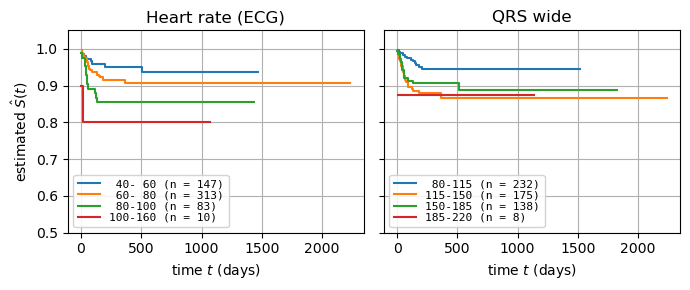

In [221]:
feature_names = ['FC_x', 'AnchuraQRS']
feature_X = [FC_x_categorical, AnchuraQRS_categorical]

fig = plt.figure(figsize=(7,3))
for i, (feature, X) in enumerate(zip(feature_names, feature_X)): 
    plt.subplot(1, 2, i+1)
    for value in np.sort(X[feature].unique()): 
        mask = X[feature] == value
        time_cell, survival_prob_cell = kaplan_meier_estimator(y['Ingreso'][mask], y['t'][mask])
        plt.step(time_cell, survival_prob_cell, where='post', label="%s (n = %d)" % (value, mask.sum()))
        plt.title(f'{names_map[feature]}')

    if i in [0]: 
        plt.ylabel("estimated $\hat{S}(t)$")
        plt.yticks([0.5, 0.6, 0.7, 0.8, 0.9, 1.0])
    else: 
        plt.yticks([0.5, 0.6, 0.7, 0.8, 0.9, 1.0], ['', '', '', '', '', ''])
    plt.xlabel("time $t$ (days)")
    plt.ylim(0.5, 1.05)
    plt.tight_layout()
    plt.grid()
    plt.legend(loc="best", framealpha=0.85, labelspacing=0.1, prop={'family': 'DejaVu Sans Mono', 'size': 8.1})
fig.savefig(f'figs/KM_ecg.pdf', bbox_inches='tight', format='pdf')

## Generate other plots

<>:16: SyntaxWarning: invalid escape sequence '\h'
<>:16: SyntaxWarning: invalid escape sequence '\h'
/tmp/ipykernel_567472/3696793573.py:16: SyntaxWarning: invalid escape sequence '\h'
  plt.ylabel("estimated $\hat{S}(t)$")


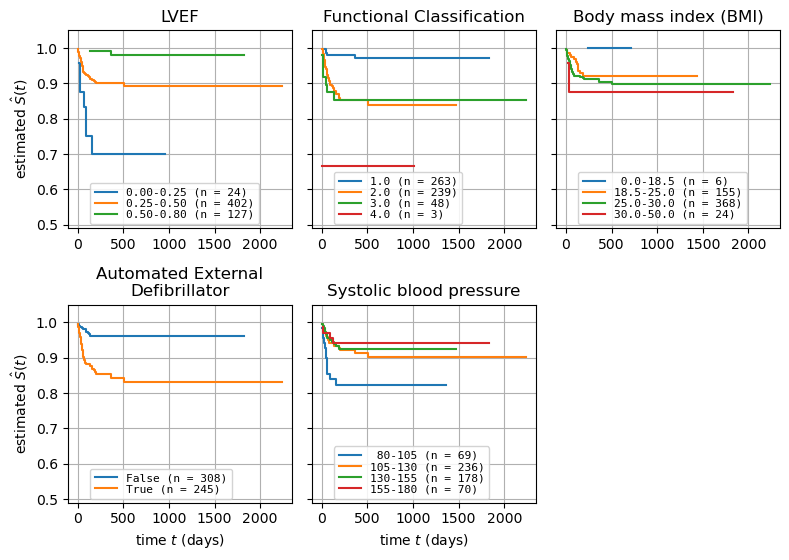

In [228]:
with open("data/X_admissions.df", "rb") as f: 
    X = pk.load(f)

feature_names = ['FEVI', 'idCONSULTA_MED_ClaseFuncionalActual', 'IMC', 'portadorDAIEstado', 'PAS']
feature_X = [FEVI_categorical, X, IMC_categorical, X, PAS_categorical]

fig = plt.figure(figsize=(8, 5.7))
for i, (feature, X) in enumerate(zip(feature_names, feature_X)): 
    plt.subplot(2, 3, i+1)
    for value in np.sort(X[feature].unique()): 
        mask = X[feature] == value
        time_cell, survival_prob_cell = kaplan_meier_estimator(y['Ingreso'][mask], y['t'][mask])
        plt.step(time_cell, survival_prob_cell, where='post', label="%s (n = %d)" % (value, mask.sum()))
        plt.title(f'{names_map[feature]}')
    if i in [0, 3]: 
        plt.ylabel("estimated $\hat{S}(t)$")
        plt.yticks([0.5, 0.6, 0.7, 0.8, 0.9, 1.0])
    else: 
        plt.yticks([0.5, 0.6, 0.7, 0.8, 0.9, 1.0], ['', '', '', '', '', ''])
    if i in [3, 4, 5]: 
        plt.xlabel("time $t$ (days)")
    plt.ylim(0.49, 1.05)
    plt.tight_layout()
    plt.grid()
    plt.legend(loc=[0.1, 0.02], framealpha=0.85, labelspacing=0.1, prop={'family': 'DejaVu Sans Mono', 'size': 8.1})
fig.savefig(f'figs/KM_other.pdf', bbox_inches='tight', format='pdf')